In [21]:
print("hello world")

hello world


In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import plotly.express as px

In [23]:
path = "Data/FR_youtube_trending_data.csv"
df = pd.read_csv(path)

In [24]:
df.shape

(86191, 16)

In [25]:
df.drop_duplicates(subset ="video_id", keep = 'first', inplace=True)

In [26]:
df.shape

(17868, 16)

In [27]:
df.head()

video_id                                              title  \
0  7rlwxSPUcQk           ON EST POSITIF AU COVID-19 (coronavirus)   
1  AcBd_RH9JSw  PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AV...   
2  JVm8P6kKgD0  FRANGLISH - My Salsa feat. Tory Lanez (clip of...   
3  JfgeD7xWy-w                    L’ÉTÉ LE PLUS ECLATÉ DE MA LIFE   
4  P3IkBxra3a8             JE L’ESSAYE ENFIN ! DUCATI HYPERMOTARD   

            publishedAt                 channelId  channelTitle  categoryId  \
0  2020-08-11T16:00:31Z  UCpWaR3gNAQGsX48cIlQC0qw  Tibo InShape          17   
1  2020-08-11T10:55:22Z  UCUl7mwOyySfZzUkq4H29nug     LeBouseuh          24   
2  2020-08-12T10:00:11Z  UCnwfc0O-LGEg8y9bEQTaSgQ     Franglish          10   
3  2020-08-11T16:00:08Z  UCMj2VQ3-8zpyeAI7dU0T-Bg       Fahd El          23   
4  2020-08-12T08:00:05Z  UC-uy7_1hColMpQ_2rs-kY6w     KIKANINAC          24   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  tibo inshape|teamshape|POSITIF AU COVID-19|pos...   
1  2020-08-12T00:00:00Z                                             [None]   
2  2020-08-12T00:00:00Z  franglish|tory lanez|my salsa|c'est plus l'heu...   
3  2020-08-12T00:00:00Z                                             [None]   
4  2020-08-12T00:00:00Z  ducati|hypermotard|950|rve|essai|test|supermot...   

   view_count   likes  dislikes  comment_count  \
0     1943013  165557      4198          15777   
1     1823553  346839      2767           8030   
2      196340   22362       187           1148   
3      311609   29561       418           3213   
4      100691   10471        90            384   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/7rlwxSPUcQk/default.jpg              False   
1  https://i.ytimg.com/vi/AcBd_RH9JSw/default.jpg              False   
2  https://i.ytimg.com/vi/JVm8P6kKgD0/default.jpg              False   
3  https://i.ytimg.com/vi/JfgeD7xWy-w/default.jpg              False   
4  https://i.ytimg.com/vi/P3IkBxra3a8/default.jpg              False   

   ratings_disabled                                        description  
0             False  On a fait le test du coronavirus avec @Juju Fi...  
1             False  Abonne toi à ma chaîne ►  http://urlz.fr/4jF2N...  
2             False  My Salsa featuring Tory Lanez, extrait du nouv...  
3             False  La famille, n'hésitez pas à vous abonner et à ...  
4             False  Essai de la Ducati Hypermotard 950 RVE !👕  BOU...

In [28]:
subset = df[['categoryId','likes','view_count','comment_count','dislikes']]
subset.head()

categoryId   likes  view_count  comment_count  dislikes
0          17  165557     1943013          15777      4198
1          24  346839     1823553           8030      2767
2          10   22362      196340           1148       187
3          23   29561      311609           3213       418
4          24   10471      100691            384        90

In [29]:
fig1 = px.scatter(subset, x="comment_count", y="likes", color="categoryId",
                 size="view_count")
fig1.update_layout(title="4 Features Representation")
fig1.show()

In [30]:
fig2 = px.scatter_3d(subset, x="comment_count", y="likes",z="dislikes", color="categoryId",
                 size="view_count")
fig2.update_layout(title="4 Features Representation")
fig2.show()

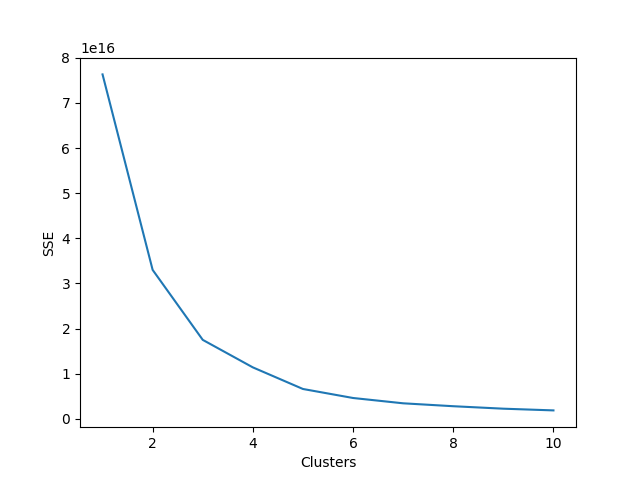

In [31]:
from sklearn.cluster import KMeans
#elbow method
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(subset)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [32]:
subset.head()

categoryId   likes  view_count  comment_count  dislikes
0          17  165557     1943013          15777      4198
1          24  346839     1823553           8030      2767
2          10   22362      196340           1148       187
3          23   29561      311609           3213       418
4          24   10471      100691            384        90

In [33]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17868 entries, 0 to 86079
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   categoryId     17868 non-null  int64
 1   likes          17868 non-null  int64
 2   view_count     17868 non-null  int64
 3   comment_count  17868 non-null  int64
 4   dislikes       17868 non-null  int64
dtypes: int64(5)
memory usage: 837.6 KB


On rends uniforme les valeurs 

In [34]:
cols = subset.columns

In [35]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(subset)

df_uni = pd.DataFrame(X,columns=[cols])

In [36]:
df_uni.head()

categoryId     likes view_count comment_count  dislikes
0   0.571429  0.023284   0.025182      0.004640  0.010355
1   0.821429  0.048779   0.023634      0.002361  0.006825
2   0.321429  0.003145   0.002545      0.000338  0.000461
3   0.785714  0.004157   0.004039      0.000945  0.001031
4   0.821429  0.001473   0.001305      0.000113  0.000222

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,random_state=0)

subset['cluster'] = kmeans.fit_predict(df_uni)

#kmeans.fit(df_uni)

/usr/local/python/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/tmp/ipykernel_14099/3939545250.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
#clusters_labels = kmeans.predict(df_uni)

In [39]:
subset.head()

categoryId   likes  view_count  comment_count  dislikes  cluster
0          17  165557     1943013          15777      4198        0
1          24  346839     1823553           8030      2767        2
2          10   22362      196340           1148       187        1
3          23   29561      311609           3213       418        2
4          24   10471      100691            384        90        2

In [40]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

colors = ['#DF2020', '#81DF20', '#2095DF','#FF33E1','#F99400']

subset['c'] = subset.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

/tmp/ipykernel_14099/1458291921.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
fig3 = px.scatter_3d(subset, x="comment_count", y="likes",z="dislikes", color='c',
                 size="view_count")
fig3.update_layout(title="4 Features Representation")
fig3.show()


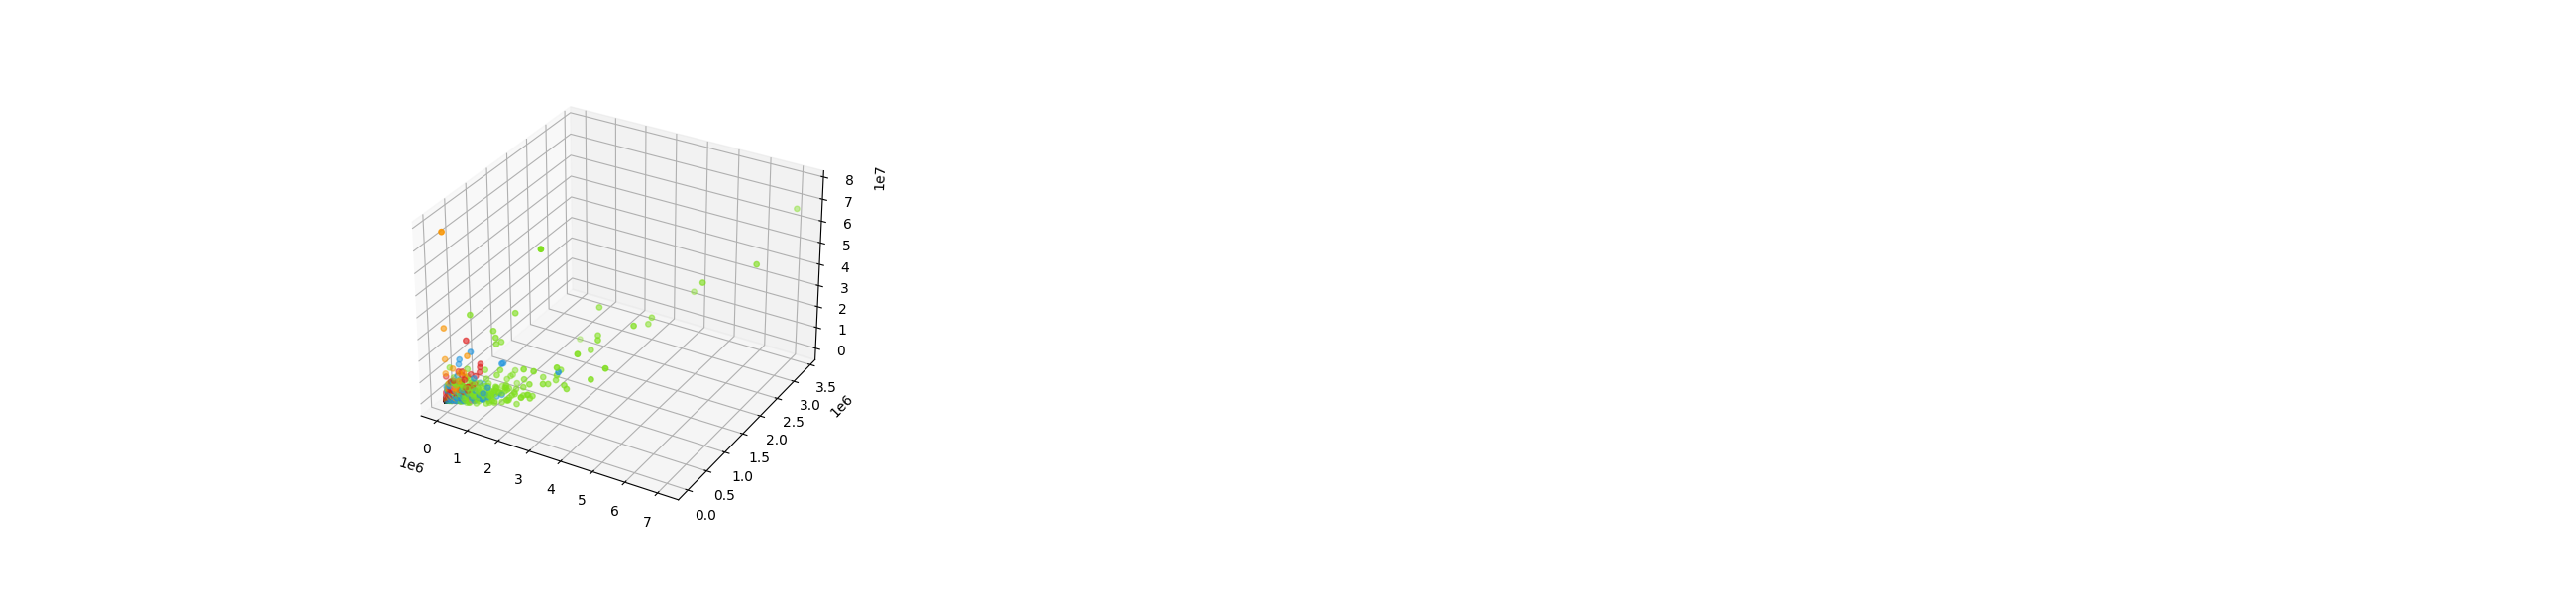

In [42]:
fig4 = plt.figure(figsize=(26,6))
ax = fig4.add_subplot(131, projection='3d')
ax.scatter(subset.likes, subset.comment_count, subset.view_count, c=subset.c, s=15)
plt.show()

In [51]:
subset.info

<bound method DataFrame.info of        categoryId   likes  view_count  comment_count  dislikes  cluster  \
0              17  165557     1943013          15777      4198        0   
1              24  346839     1823553           8030      2767        2   
2              10   22362      196340           1148       187        1   
3              23   29561      311609           3213       418        2   
4              24   10471      100691            384        90        2   
...           ...     ...         ...            ...       ...      ...   
86068           2    3190       47581            303        34        3   
86070          20   44338      499196           2154       811        0   
86072          24    2518       45705             97       122        2   
86073          20   33390      340537            895       285        0   
86079          28    4557       75361            193        47        4   

             c  
0      #DF2020  
1      #2095DF  
2      #81DF20  

In [56]:
df_cluster1 = subset.loc[subset.cluster == 0]
df_cluster2 = subset.loc[subset.cluster == 1]
df_cluster3 = subset.loc[subset.cluster == 2]
df_cluster4 = subset.loc[subset.cluster == 3]
df_cluster5 = subset.loc[subset.cluster == 4]

In [57]:
df_cluster1.head()

categoryId   likes  view_count  comment_count  dislikes  cluster        c
0           17  165557     1943013          15777      4198        0  #DF2020
7           17    6706       73297            567       126        0  #DF2020
9           20    5151       39307            486       549        0  #DF2020
14          20  146740     2381688          16549      2794        0  #DF2020
27          17    5355       51427            171        33        0  #DF2020

test clustering


In [43]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [44]:
df = pd.read_csv("Data/company-stock-movements-2010-2015.csv")

In [45]:
X = df.drop(df.columns[0],axis=1)
y = df[df.columns[0]]

In [46]:
norm = Normalizer()

kmean = KMeans(n_clusters=10,random_state=1)

pipeline = make_pipeline(norm,kmean)

pipeline.fit(X)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10, random_state=1))])

In [47]:
# Predict the cluster labels: labels
clusters_labels = pipeline.predict(X)

# Create a DataFrame aligning cluster labels and companies
df2 = pd.DataFrame({'cluster labels': clusters_labels, 'companies': y.values})

# Display df sorted by cluster label
print(df2.sort_values('cluster labels'))


    cluster labels                           companies
20               0                          Home Depot
39               0                              Pfizer
58               0                               Xerox
16               0                   General Electrics
38               1                               Pepsi
28               1                           Coca Cola
27               1                      Kimberly-Clark
25               1                   Johnson & Johnson
40               1                      Procter Gamble
41               1                       Philip Morris
56               1                            Wal-Mart
9                1                   Colgate-Palmolive
10               2                      ConocoPhillips
57               2                               Exxon
37               2                            Novartis
42               2                   Royal Dutch Shell
43               2                                 SAP
44        